In [1]:
import numpy as np
import pylab as pl
import sklearn.cluster
import json
import os
import urllib
pl.rcdefaults() 
url = "https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json"
response = urllib.urlopen(url)
s = json.loads(response.read())

s['axes.edgecolor'] = 'white'
pl.rcParams.update(s)
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## generating random data:
## 2 gaussian distributions, differnt means, different stsndard deviations


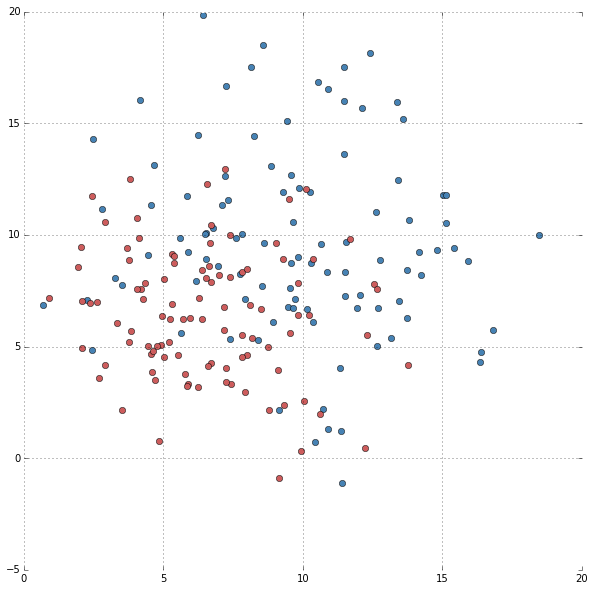

In [4]:
pl.figure(figsize = (10,10))
np.random.seed(1999)
k1s, k1m = np.random.rand()*5, random.rand()*10
k1 = (k1s*np.random.randn(2, 100)+k1m).T
k2s, k2m = np.random.rand()*5, random.rand()*10
k2 = (k2s*np.random.randn(2, 100)+k2m).T
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')



##choose 2 random starting points: random locations within the distribution


In [83]:
np.random.seed(1999)
x0, y0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
x1, y1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()

15.4922049092 21.615351608 12.3650556132 4.74634719431


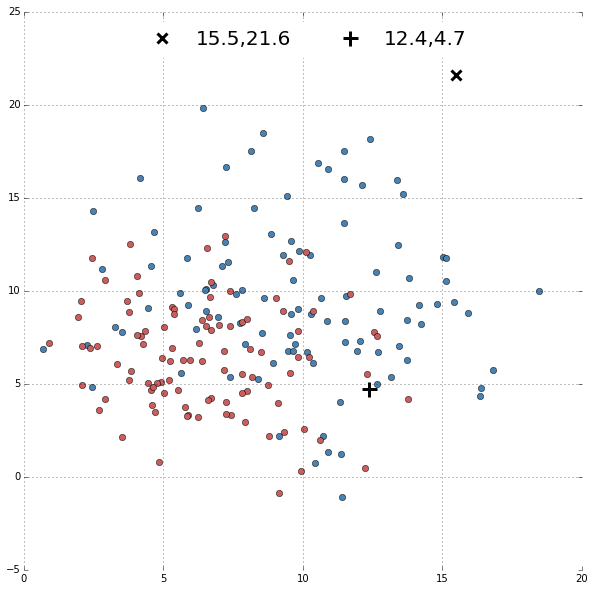

In [84]:
x_save = (x0,x1)
y_save = (y0,y1)

pl.figure(figsize = (10,10))
print x0,y0,x1,y1
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(x0,y0))
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(x1,y1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)


##define a distance matric


In [85]:
#Eucledian distance
def dist (data, c):
    return (data[0]-c[0])**2 + (data[1]-c[1])**2


In [86]:
l1 = np.zeros(len(k1), int)
for i,k in enumerate(k1):
    l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
l2 = np.zeros(len(k2), int)
for i,k in enumerate(k2):
    l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1

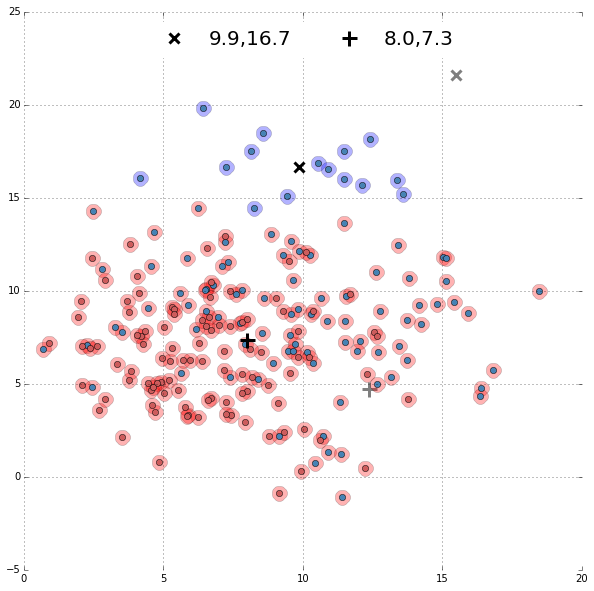

In [87]:
pl.figure(figsize = (10,10))

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)

pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=15, alpha = 0.3)
pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=15, alpha = 0.3)
pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=15, alpha = 0.3)
pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=15, alpha = 0.3)
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)



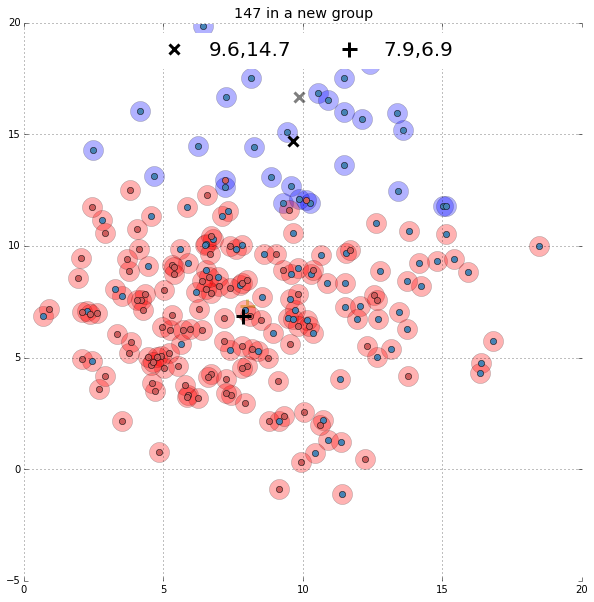

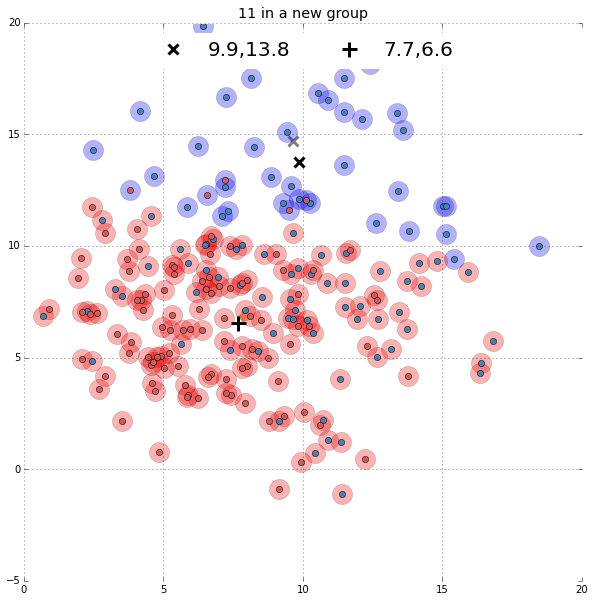

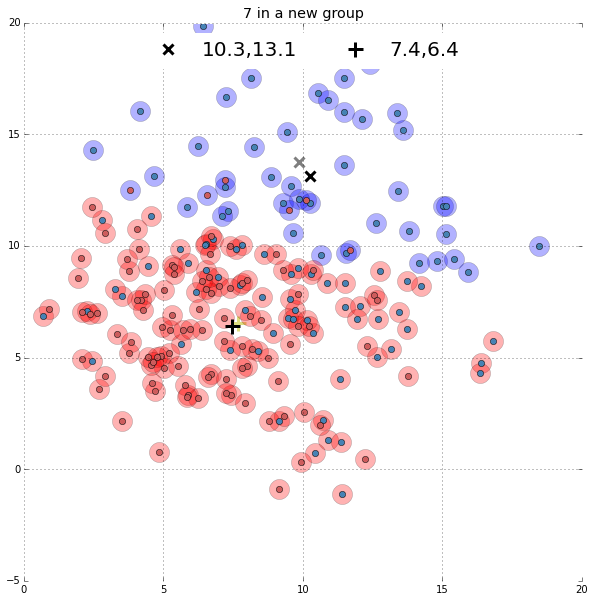

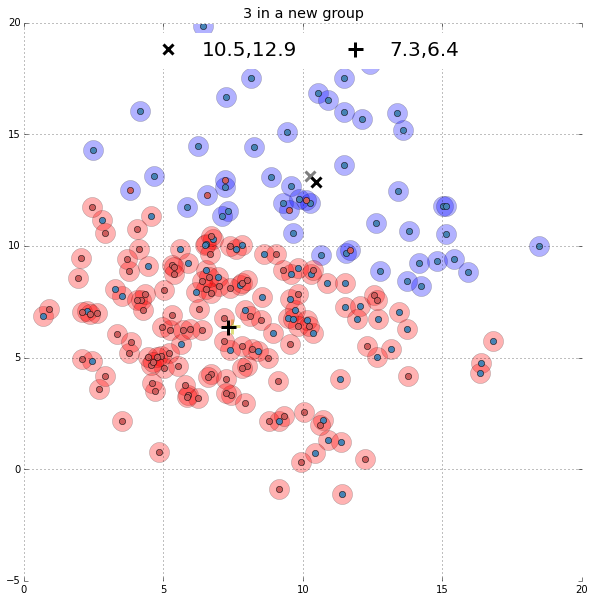

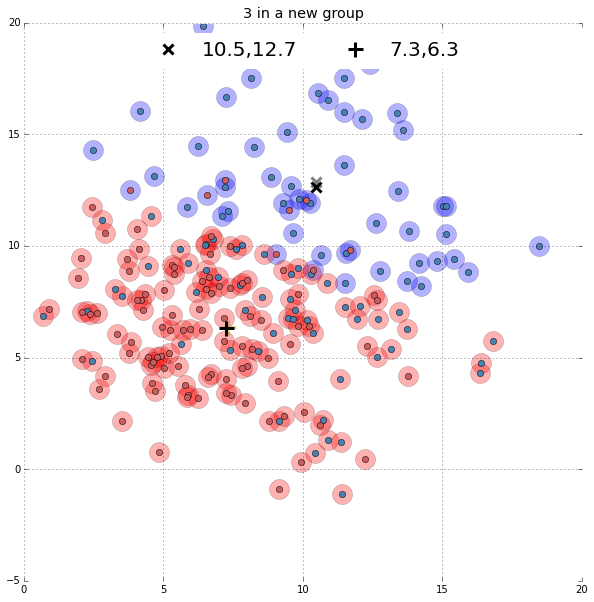

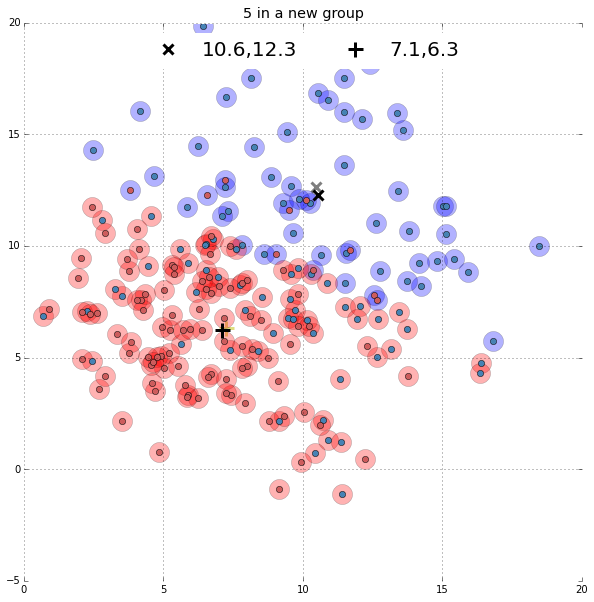

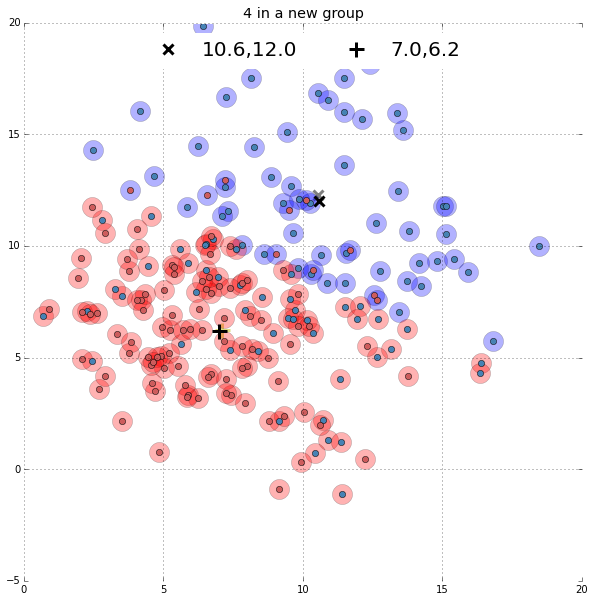

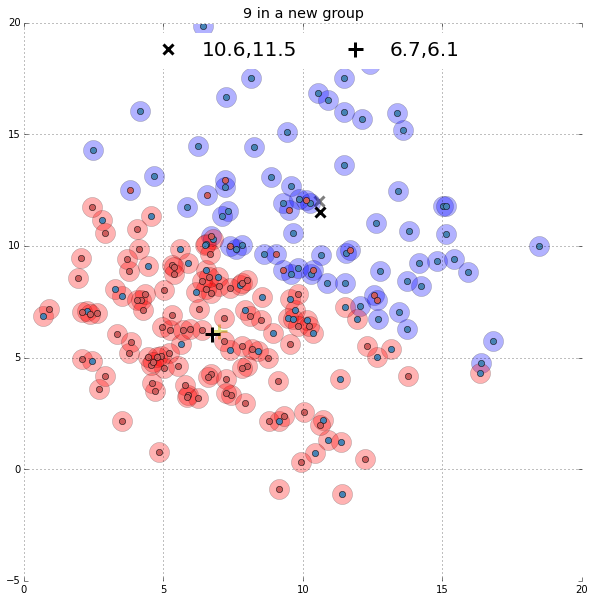

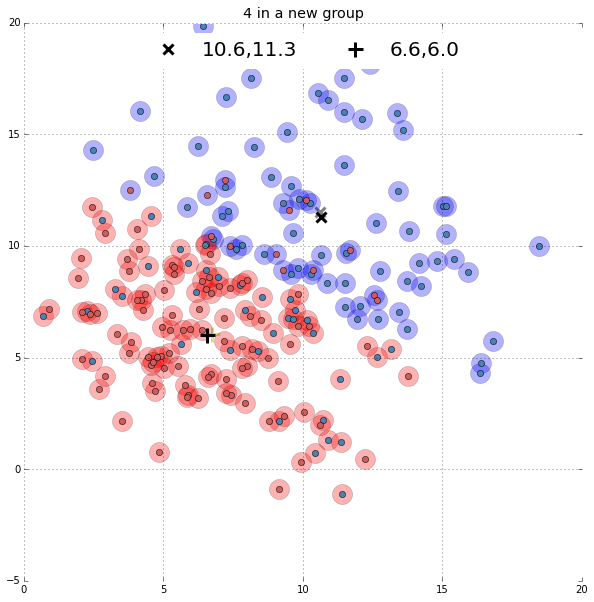

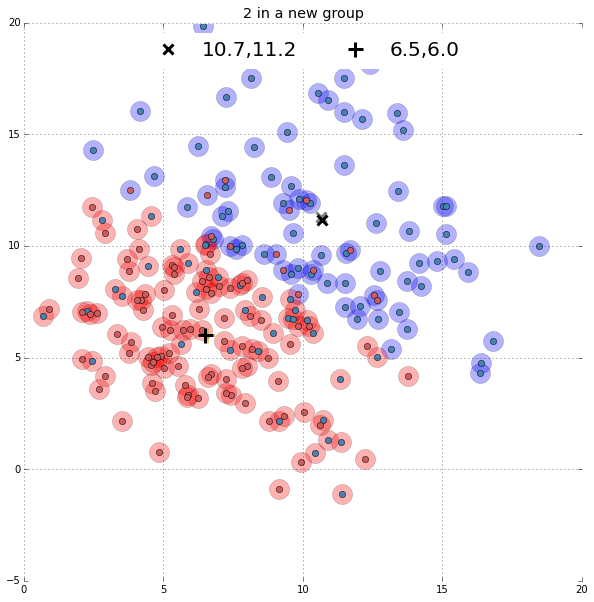

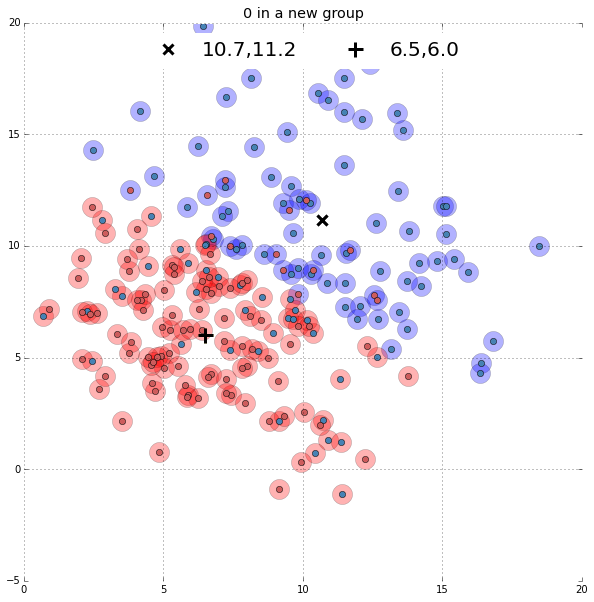

In [88]:
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)

while not xnew0 == x0 or  not ynew0 == y0 or  not xnew1 == x1 or  not ynew1 == y1:
    pl.figure(figsize = (10,10))
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1
    
    l1 = np.zeros(len(k1), int)
    for i,k in enumerate(k1):
        l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
    l2 = np.zeros(len(k2), int)
    for i,k in enumerate(k2):
        l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
        
        
    pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    pl.plot([x1], [y1], 'y+', ms = 15, mew=3, alpha=0.5)

    pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k1[:,0], k1[:,1], 'o')
    pl.plot(k2[:,0], k2[:,1], 'o')

    xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
    xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
    pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
    pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
    pl.title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2



In [94]:
print "the original centers were:  %.1f %.1f, %.1f %.1f"%(x_save[0], y_save[0], 
                                                         x_save[1], y_save[1])
print "the new K-means center are: %.1f %.1f, %.1f %.1f"%(xnew0, ynew0, 
                                                         xnew1, ynew1)

the original centers were:  15.5 21.6, 12.4 4.7
the new K-means center are: 10.7 11.2, 6.5 6.0


10.4505939582 5.83634538174 6.17269247193 9.8630024609


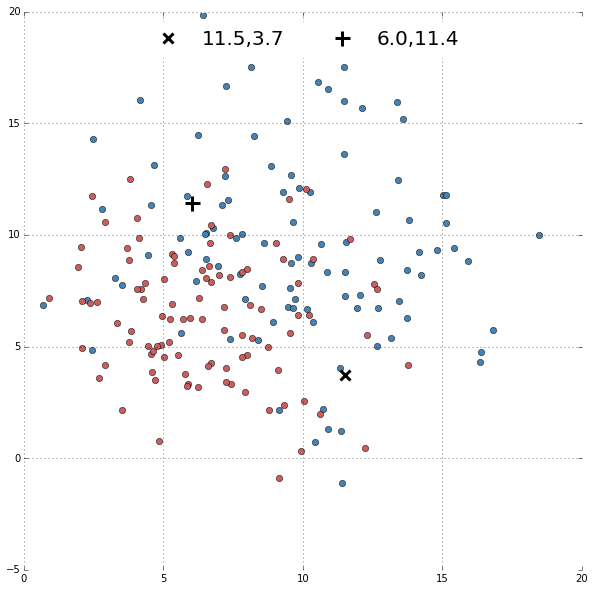

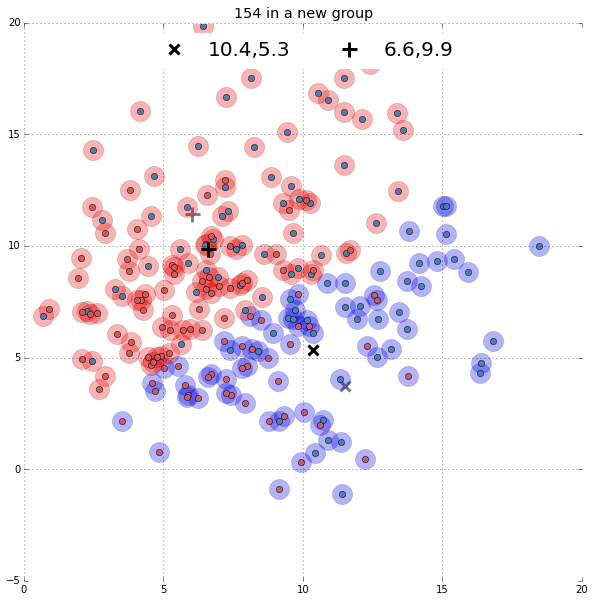

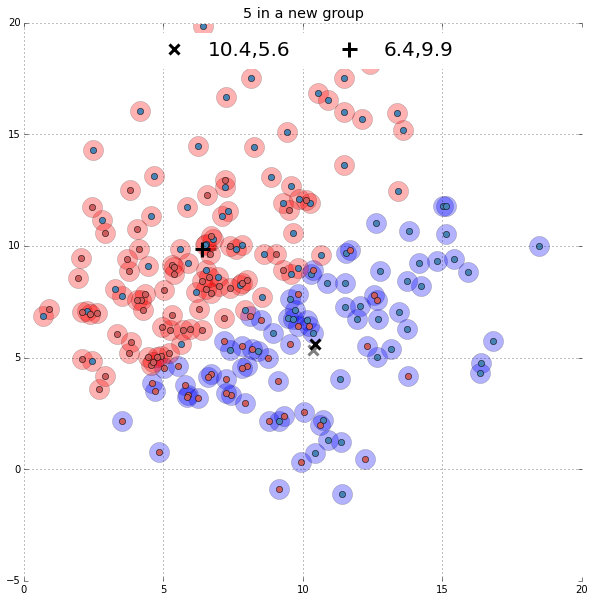

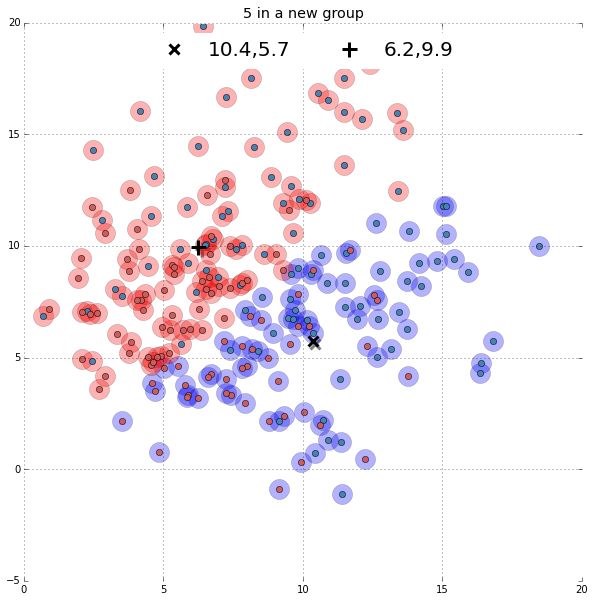

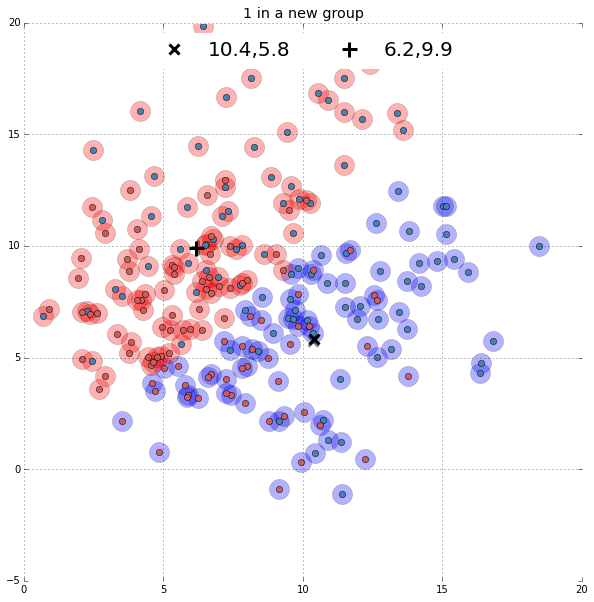

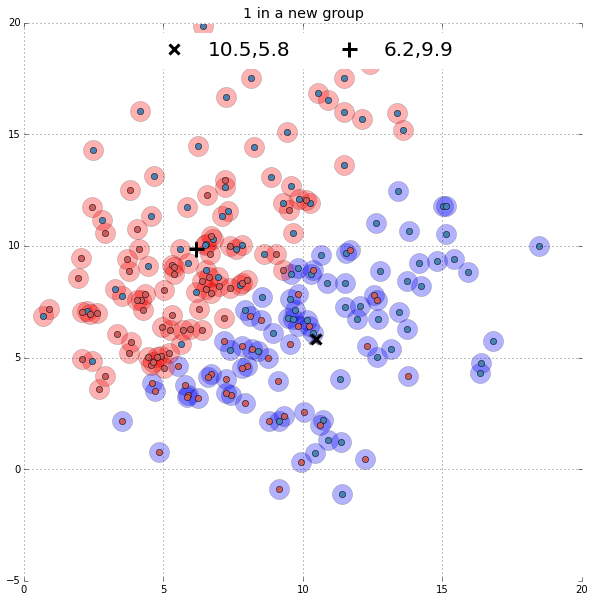

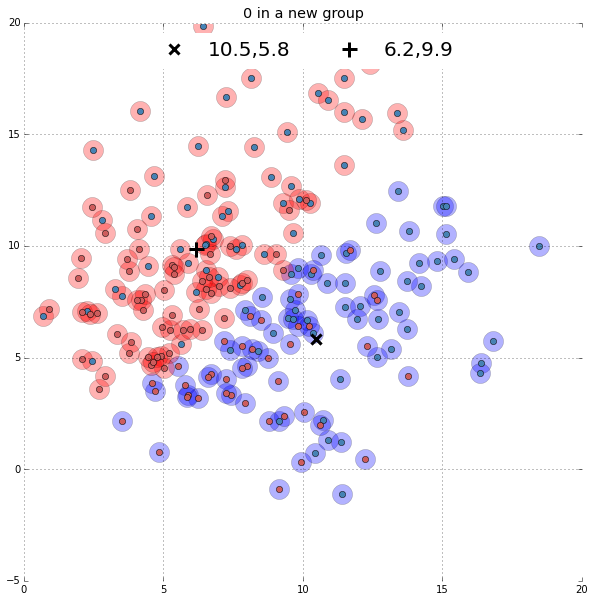

In [100]:
np.random.seed(111)
xnew0, ynew0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
xnew1, ynew1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)
l1 = np.empty_like(l1)
l2 = np.empty_like(l2)
x_save = (xnew0, xnew1)
y_save = (ynew0, ynew1)
pl.figure(figsize = (10,10))
print x0,y0,x1,y1
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0, ynew0))
pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1, ynew1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)

while not xnew0 == x0 or  not ynew0 == y0 or  not xnew1 == x1 or  not ynew1 == y1:
    pl.figure(figsize=(10,10))
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1
    
    l1 = np.zeros(len(k1), int)
    for i,k in enumerate(k1):
        l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
    l2 = np.zeros(len(k2), int)
    for i,k in enumerate(k2):
        l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
        
        
    pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)

    pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k1[:,0], k1[:,1], 'o')
    pl.plot(k2[:,0], k2[:,1], 'o')

    xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
    xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
    pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
    pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
    pl.title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2



In [101]:
print "the original centers were:  %.1f %.1f, %.1f %.1f"%(x_save[0], y_save[0], 
                                                         x_save[1], y_save[1])
print "the new K-means center are: %.1f %.1f, %.1f %.1f"%(xnew0, ynew0, 
                                                         xnew1, ynew1)

the original centers were:  11.5 3.7, 6.0 11.4
the new K-means center are: 10.5 5.8, 6.2 9.9
